# Assignment 4: Build a Supervised Autoencoder.

### Name: Atharv Subhekar

### Due Date: Tuesday 5/2/2023 11:59PM


PCA and the standard autoencoder are unsupervised dimensionality reduction methods, and their learned features are not discriminative. If you build a classifier upon the low-dimenional features extracted by PCA and autoencoder, you will find the classification accuracy very poor.

Linear discriminant analysis (LDA) is a traditionally supervised dimensionality reduction method for learning low-dimensional features which are highly discriminative. Likewise, can we extend autoencoder to supervised leanring?



**You are required to build and train a supervised autoencoder look like the following.** You are required to add other layers properly to alleviate overfitting.


![Network Structure](https://github.com/wangshusen/CS583A-2019Spring/blob/master/homework/HM5/supervised_ae.png?raw=true "NetworkStructure")


## 0. You will do the following:

1. Build a standard dense autoencoder, visual the low-dim features and the reconstructions, and evaluate whether the learned low-dim features are discriminative.

2. Repeat the above process by training a supervised autoencoder.


## 1. Data preparation

### 1.1. Load data


In [7]:
from keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28*28).astype('float32') / 255.
x_test = x_test.reshape(10000, 28*28).astype('float32') / 255.

print('Shape of x_train: ' + str(x_train.shape)) 
print('Shape of x_test: ' + str(x_test.shape))
print('Shape of y_train: ' + str(y_train.shape))
print('Shape of y_test: ' + str(y_test.shape))

Shape of x_train: (60000, 784)
Shape of x_test: (10000, 784)
Shape of y_train: (60000,)
Shape of y_test: (10000,)


### 1.2. One-hot encode the labels

In the input, a label is a scalar in $\{0, 1, \cdots , 9\}$. One-hot encode transform such a scalar to a $10$-dim vector. E.g., a scalar ```y_train[j]=3``` is transformed to the vector ```y_train_vec[j]=[0, 0, 0, 1, 0, 0, 0, 0, 0, 0]```.

1. Define a function ```to_one_hot``` that transforms an $n\times 1$ array to a $n\times 10$ matrix.

2. Apply the function to ```y_train``` and ```y_test```.

In [8]:
import numpy as np

def to_one_hot(y, num_class=10):
    results = np.zeros((len(y), num_class))
    for i, label in enumerate(y):
        results[i, label] = 1.
    return results

y_train_vec = to_one_hot(y_train)
y_test_vec = to_one_hot(y_test)

print('Shape of y_train_vec: ' + str(y_train_vec.shape))
print('Shape of y_test_vec: ' + str(y_test_vec.shape))

print(y_train[0])
print(y_train_vec[0])

Shape of y_train_vec: (60000, 10)
Shape of y_test_vec: (10000, 10)
5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


### 1.3. Randomly partition the training set to training and validation sets

Randomly partition the 60K training samples to 2 sets:
* a training set containing 10K samples;
* a validation set containing 50K samples. (You can use only 10K to save time.)


In [9]:
rand_indices = np.random.permutation(60000)
train_indices = rand_indices[0:10000]
valid_indices = rand_indices[10000:20000]

x_val = x_train[valid_indices, :]
y_val = y_train_vec[valid_indices, :]

x_tr = x_train[train_indices, :]
y_tr = y_train_vec[train_indices, :]

print('Shape of x_tr: ' + str(x_tr.shape))
print('Shape of y_tr: ' + str(y_tr.shape))
print('Shape of x_val: ' + str(x_val.shape))
print('Shape of y_val: ' + str(y_val.shape))

Shape of x_tr: (10000, 784)
Shape of y_tr: (10000, 10)
Shape of x_val: (10000, 784)
Shape of y_val: (10000, 10)


## 2. Build an unsupervised  autoencoder and tune its hyper-parameters

1. Build a dense autoencoder model
2. Your encoder should contain 3 dense layers and 1 bottlenect layer with 2 as  output size. 
3. Your decoder should contain 4 dense layers with 784 as output size.
4. You can choose different number of hidden units in dense layers.
5. Do not add other layers (no activation layers), you may add them in later sections.
6. Use the validation data to tune the hyper-parameters (e.g., network structure, and optimization algorithm)
    * Do NOT use test data for hyper-parameter tuning!!!
    
7. Try to achieve a validation loss as low as possible.
8. Evaluate the model on the test set.
9. Visualize the low-dim features and reconstructions.


### 2.1. Build the model (20 points)

In [10]:
from keras.layers import *
from keras import models

input_img = Input(shape=(784,), name='input_img')

encode1 =  Dense(100, activation='relu', name='Encode1')(input_img)
encode2 = Dense(50, activation='relu', name='Encode2')(encode1)
encode3 = Dense (20, activation='relu', name='Encode3')(encode2)

bottleneck = Dense(2, activation='relu', name='Bottleneck')(encode3)

decode1 =  Dense(20, activation='relu', name='Decode1')(bottleneck)
decode2 = Dense(50, activation='relu', name='Decode2')(decode1)
decode3 = Dense(100, activation='relu', name='DEcode3')(decode2)
decode4 = Dense(784, activation='relu', name='Decode4')(decode3)


ae = models.Model(input_img, decode4)

ae.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_img (InputLayer)      [(None, 784)]             0         
                                                                 
 Encode1 (Dense)             (None, 100)               78500     
                                                                 
 Encode2 (Dense)             (None, 50)                5050      
                                                                 
 Encode3 (Dense)             (None, 20)                1020      
                                                                 
 Bottleneck (Dense)          (None, 2)                 42        
                                                                 
 Decode1 (Dense)             (None, 20)                60        
                                                                 
 Decode2 (Dense)             (None, 50)                1050

In [12]:
# print the network structure to a PDF file

from IPython.display import SVG
from tensorflow import keras
from keras.utils.vis_utils import model_to_dot, plot_model

SVG(model_to_dot(ae, show_shapes=False).create(prog='dot', format='svg'))

plot_model(
    model=ae, show_shapes=False,
    to_file='unsupervised_ae.pdf'
)

# you can find the file "unsupervised_ae.pdf" in the current directory.

ImportError: You must install pydot (`pip install pydot`) for model_to_dot to work.

### 2.2. Train the model and tune the hyper-parameters (5 points)

In [270]:
from tensorflow.keras import optimizers

learning_rate = 1E-3 # to be tuned!

ae.compile(loss='mean_squared_error',
           optimizer=optimizers.RMSprop(learning_rate=learning_rate))

In [271]:
history = ae.fit(x_tr, x_tr, 
                 batch_size=128, 
                 epochs=100, 
                 validation_data=(x_val, x_val))

Epoch 1/100


2023-05-02 19:09:40.754802: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - ETA: 0s - loss: 0.0787

2023-05-02 19:09:42.931675: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


79/79 [==============================] - 3s 25ms/step - loss: 0.0787 - val_loss: 0.0747
Epoch 2/100
79/79 [==============================] - 1s 16ms/step - loss: 0.0717 - val_loss: 0.0698
Epoch 3/100
79/79 [==============================] - 1s 14ms/step - loss: 0.0683 - val_loss: 0.0677
Epoch 4/100
79/79 [==============================] - 1s 14ms/step - loss: 0.0664 - val_loss: 0.0663
Epoch 5/100
79/79 [==============================] - 1s 15ms/step - loss: 0.0651 - val_loss: 0.0652
Epoch 6/100
79/79 [==============================] - 1s 15ms/step - loss: 0.0640 - val_loss: 0.0636
Epoch 7/100
79/79 [==============================] - 1s 17ms/step - loss: 0.0624 - val_loss: 0.0639
Epoch 8/100
79/79 [==============================] - 1s 14ms/step - loss: 0.0613 - val_loss: 0.0613
Epoch 9/100
79/79 [==============================] - 1s 15ms/step - loss: 0.0598 - val_loss: 0.0595
Epoch 10/100
79/79 [==============================] - 1s 14ms/step - loss: 0.0580 - val_loss: 0.0588
Epoch 11/10

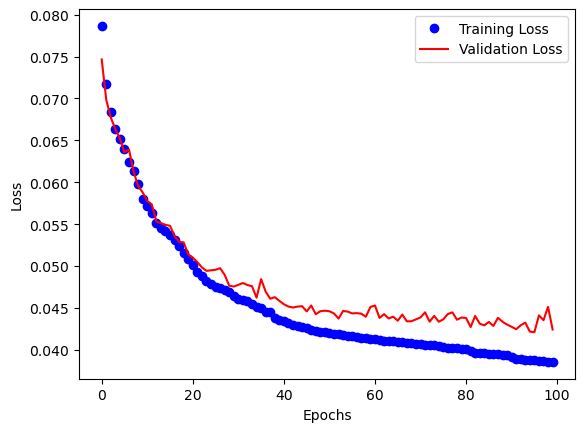

In [272]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 2.3. Visualize the reconstructed test images (5 points)

 37/313 [==>...........................] - ETA: 0s

2023-05-02 19:11:35.564905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step


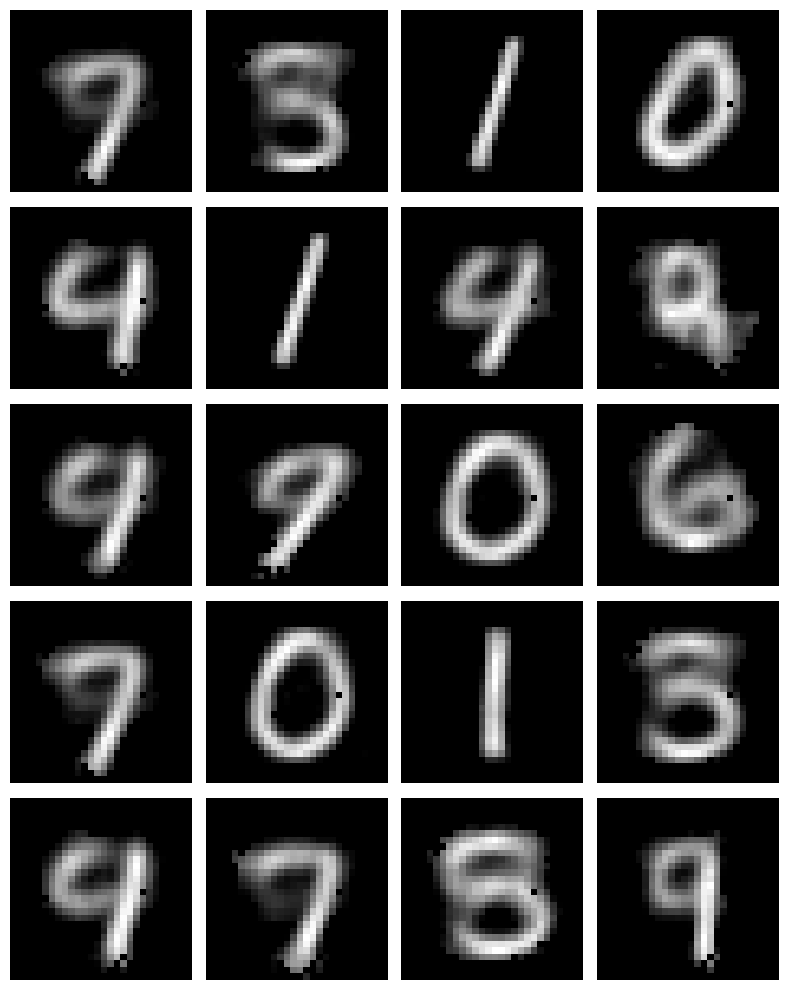

In [273]:
ae_output = ae.predict(x_test).reshape((10000, 28, 28))

ROW = 5
COLUMN = 4

x = ae_output
fname = 'reconstruct_ae.pdf'

fig, axes = plt.subplots(nrows=ROW, ncols=COLUMN, figsize=(8, 10))
for ax, i in zip(axes.flat, np.arange(ROW*COLUMN)):
    image = x[i].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.savefig(fname)
plt.show()

### 2.4. Evaluate the model on the test set

Do NOT used the test set until now. Make sure that your model parameters and hyper-parameters are independent of the test set.

In [274]:
loss = ae.evaluate(x_test, x_test)
print('loss = ' + str(loss))

313/313 [==============================] - 1s 4ms/step - loss: 0.0421
loss = 0.04212959483265877


### 2.5. Visualize the low-dimensional features

In [275]:
# build the encoder network
ae_encoder = models.Model(input_img, bottleneck)
ae_encoder.summary()

Model: "model_43"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_img (InputLayer)      [(None, 784)]             0         
                                                                 
 Encode1 (Dense)             (None, 100)               78500     
                                                                 
 Encode2 (Dense)             (None, 50)                5050      
                                                                 
 Encode3 (Dense)             (None, 20)                1020      
                                                                 
 Bottleneck (Dense)          (None, 2)                 42        
                                                                 
Total params: 84,612
Trainable params: 84,612
Non-trainable params: 0
_________________________________________________________________


In [276]:
# extract low-dimensional features from the test data
encoded_test = ae_encoder.predict(x_test)
print('Shape of encoded_test: ' + str(encoded_test.shape))

 80/313 [======>.......................] - ETA: 0s

2023-05-02 19:11:38.039020: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Shape of encoded_test: (10000, 2)


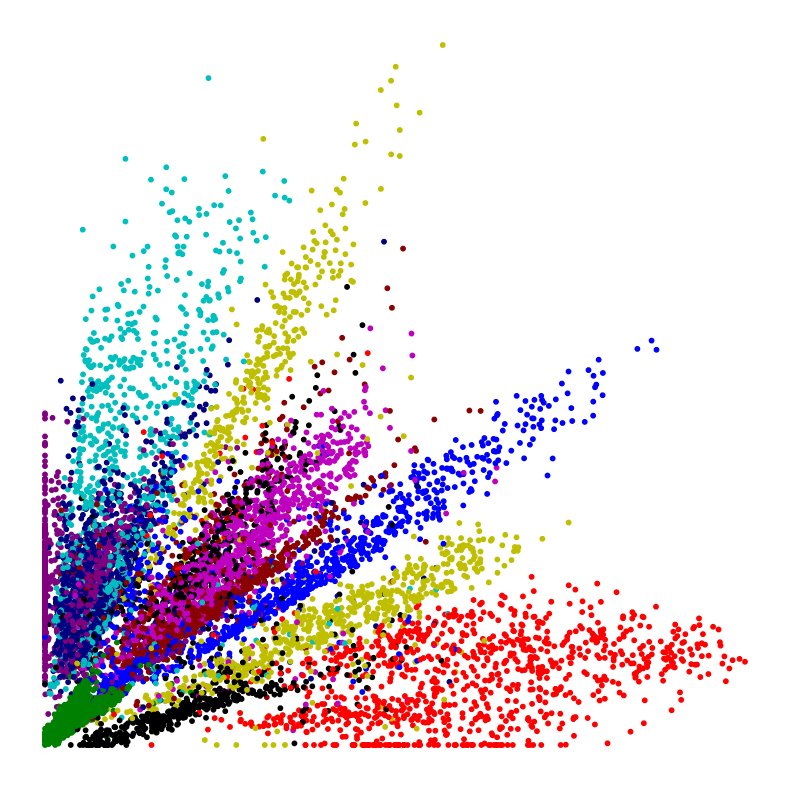

In [277]:
colors = np.array(['r', 'g', 'b', 'm', 'c', 'k', 'y', 'purple', 'darkred', 'navy'])
colors_test = colors[y_test]


import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
plt.scatter(encoded_test[:, 0], encoded_test[:, 1], s=10, c=colors_test, edgecolors=colors_test)
plt.axis('off')
plt.tight_layout()
fname = 'ae_code.pdf'
plt.savefig(fname)

#### Remark:

Judging from the visualization, the low-dim features seems not discriminative, as 2D features from different classes are mixed. Let quantatively find out whether they are discriminative.

## 3. Are the learned low-dim features discriminative? (10 points)

To find the answer, lets train a classifier on the training set (the extracted 2-dim features) and evaluation on the test set.

In [278]:
# extract the 2D features from the training, validation, and test samples
f_tr = ae_encoder.predict(x_tr)
f_val = ae_encoder.predict(x_val)
f_te = ae_encoder.predict(x_test)

print('Shape of f_tr: ' + str(f_tr.shape))
print('Shape of f_te: ' + str(f_te.shape))

313/313 [==============================] - 0s 2ms/step
Shape of f_tr: (10000, 2)
Shape of f_te: (10000, 2)


In [279]:
from keras.layers import Dense, Input
from keras import models

input_feat = Input(shape=(2,))

hidden1 = Dense(128, activation='relu')(input_feat)
hidden2 = Dense(128, activation='relu')(hidden1)
output = Dense(10, activation='softmax')(hidden2)

classifier = models.Model(input_feat, output)

classifier.summary()

Model: "model_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_9 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense_205 (Dense)           (None, 128)               384       
                                                                 
 dense_206 (Dense)           (None, 128)               16512     
                                                                 
 dense_207 (Dense)           (None, 10)                1290      
                                                                 
Total params: 18,186
Trainable params: 18,186
Non-trainable params: 0
_________________________________________________________________


In [280]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1E-4),
                  metrics=['acc'])

history = classifier.fit(f_tr, y_tr, 
                        batch_size=32, 
                        epochs=30, 
                        validation_data=(f_val, y_val))

Epoch 1/30


2023-05-02 19:11:45.901462: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 1.9787 - acc: 0.2943

2023-05-02 19:11:50.675241: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 8s 23ms/step - loss: 1.9787 - acc: 0.2943 - val_loss: 1.7594 - val_acc: 0.3511
Epoch 2/30
313/313 [==============================] - 7s 23ms/step - loss: 1.6641 - acc: 0.4171 - val_loss: 1.5906 - val_acc: 0.4651
Epoch 3/30
313/313 [==============================] - 7s 22ms/step - loss: 1.5414 - acc: 0.4794 - val_loss: 1.4871 - val_acc: 0.5135
Epoch 4/30
313/313 [==============================] - 7s 22ms/step - loss: 1.4555 - acc: 0.5341 - val_loss: 1.4093 - val_acc: 0.5709
Epoch 5/30
313/313 [==============================] - 7s 24ms/step - loss: 1.3836 - acc: 0.5851 - val_loss: 1.3354 - val_acc: 0.5778
Epoch 6/30
313/313 [==============================] - 7s 22ms/step - loss: 1.3178 - acc: 0.6055 - val_loss: 1.2716 - val_acc: 0.5913
Epoch 7/30
313/313 [==============================] - 7s 22ms/step - loss: 1.2565 - acc: 0.6197 - val_loss: 1.2149 - val_acc: 0.6263
Epoch 8/30
313/313 [==============================] - 7s 22ms/step - loss: 1.205

### Conclusion

Using the 2D features, the validation accuracy is 60~70%. Recall that using the original data, the accuracy is about 97%. Obviously, the 2D features are not very discriminative.

We are going to build a supervised autoencode model for learning low-dimensional discriminative features.

## 4. Build a supervised autoencoder model


**You are required to build and train a supervised autoencoder look like the following.** (Not necessary the same. You can use convolutional layers as well.) You are required to add other layers properly to alleviate overfitting.


![Network Structure](https://github.com/wangshusen/CS583A-2019Spring/blob/master/homework/HM5/supervised_ae.png?raw=true "NetworkStructure")


### 4.1. Build the network (30 points)

In [282]:
# build the supervised autoencoder network
from keras.layers import *
from keras import models

input_img = Input(shape=(784,), name='input_img')

# encoder network
encode1 =  Dense(100, activation='relu', name='Encode1')(input_img)
encode2 = Dense(50, activation='relu', name='Encode2')(encode1)
encode3 = Dense (20, activation='relu', name='Encode3')(encode2)
# The width of the bottleneck layer must be exactly 2.
bottleneck = Dense(2,activation='relu', name='Bottleneck')(encode3)
# decoder network
decode1 =  Dense(20, activation='relu', name='Decode1')(bottleneck)
decode2 = Dense(50, activation='relu', name='Decode2')(decode1)
decode3 = Dense(100, activation='relu', name='Decode3')(decode2)
decode4 = Dense(784, activation='relu', name='Decode4')(decode3)


# build a classifier upon the bottleneck layer
classifier1 = Dense(128, activation='relu', name='Classifier1')(bottleneck) # <add a dense layer taking bottleneck as input>
classifier2 = Dense(128, activation='relu', name='Classifier2')(classifier1) 
classifier3 = BatchNormalization()#<Add more dense layers and regularizations...>
classifier3 = Dense(10, activation='softmax', name='Output')(classifier2)#<the output of classifier network>

In [283]:
# connect the input and the two outputs
sae = models.Model(input_img, [decode4, classifier3])

sae.summary()

Model: "model_45"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 784)]        0           []                               
                                                                                                  
 Encode1 (Dense)                (None, 100)          78500       ['input_img[0][0]']              
                                                                                                  
 Encode2 (Dense)                (None, 50)           5050        ['Encode1[0][0]']                
                                                                                                  
 Encode3 (Dense)                (None, 20)           1020        ['Encode2[0][0]']                
                                                                                           

In [284]:
# print the network structure to a PDF file

from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot, plot_model

SVG(model_to_dot(sae, show_shapes=False).create(prog='dot', format='svg'))

plot_model(
    model=sae, show_shapes=False,
    to_file='supervised_ae.pdf'
)

# you can find the file "supervised_ae.pdf" in the current directory.

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


AttributeError: 'NoneType' object has no attribute 'create'

### 4.2. Train the new model and tune the hyper-parameters

The new model has multiple output. Thus we specify **multiple** loss functions and their weights. 

In [285]:
from tensorflow.keras import optimizers

sae.compile(loss=['mean_squared_error', 'categorical_crossentropy'],
            loss_weights=[1, 0.5], # to be tuned
            optimizer=optimizers.RMSprop(learning_rate=1E-3))

history = sae.fit(x_tr, [x_tr, y_tr], 
                  batch_size=32, 
                  epochs=100, 
                  validation_data=(x_val, [x_val, y_val]))

Epoch 1/100


2023-05-02 19:15:34.909512: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.6961 - Decode4_loss: 0.0716 - Output_loss: 1.2491

2023-05-02 19:15:44.436389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 14s 39ms/step - loss: 0.6961 - Decode4_loss: 0.0716 - Output_loss: 1.2491 - val_loss: 0.4663 - val_Decode4_loss: 0.0635 - val_Output_loss: 0.8055
Epoch 2/100
313/313 [==============================] - 12s 37ms/step - loss: 0.3710 - Decode4_loss: 0.0606 - Output_loss: 0.6209 - val_loss: 0.3451 - val_Decode4_loss: 0.0605 - val_Output_loss: 0.5692
Epoch 3/100
313/313 [==============================] - 11s 37ms/step - loss: 0.2624 - Decode4_loss: 0.0585 - Output_loss: 0.4079 - val_loss: 0.2635 - val_Decode4_loss: 0.0582 - val_Output_loss: 0.4106
Epoch 4/100
313/313 [==============================] - 12s 38ms/step - loss: 0.2048 - Decode4_loss: 0.0571 - Output_loss: 0.2954 - val_loss: 0.2473 - val_Decode4_loss: 0.0569 - val_Output_loss: 0.3809
Epoch 5/100
313/313 [==============================] - 12s 37ms/step - loss: 0.1772 - Decode4_loss: 0.0563 - Output_loss: 0.2417 - val_loss: 0.2140 - val_Decode4_loss: 0.0561 - val_Output_loss: 0.3158
Epoch 6

Epoch 42/100
313/313 [==============================] - 10s 32ms/step - loss: 0.0624 - Decode4_loss: 0.0468 - Output_loss: 0.0313 - val_loss: 0.5540 - val_Decode4_loss: 0.0490 - val_Output_loss: 1.0100
Epoch 43/100
313/313 [==============================] - 10s 32ms/step - loss: 0.0684 - Decode4_loss: 0.0468 - Output_loss: 0.0432 - val_loss: 0.4354 - val_Decode4_loss: 0.0483 - val_Output_loss: 0.7741
Epoch 44/100
313/313 [==============================] - 10s 32ms/step - loss: 0.0643 - Decode4_loss: 0.0466 - Output_loss: 0.0354 - val_loss: 0.4473 - val_Decode4_loss: 0.0483 - val_Output_loss: 0.7980
Epoch 45/100
313/313 [==============================] - 10s 33ms/step - loss: 0.0654 - Decode4_loss: 0.0465 - Output_loss: 0.0378 - val_loss: 0.4783 - val_Decode4_loss: 0.0477 - val_Output_loss: 0.8613
Epoch 46/100
313/313 [==============================] - 10s 32ms/step - loss: 0.0705 - Decode4_loss: 0.0465 - Output_loss: 0.0480 - val_loss: 0.4034 - val_Decode4_loss: 0.0482 - val_Output_los

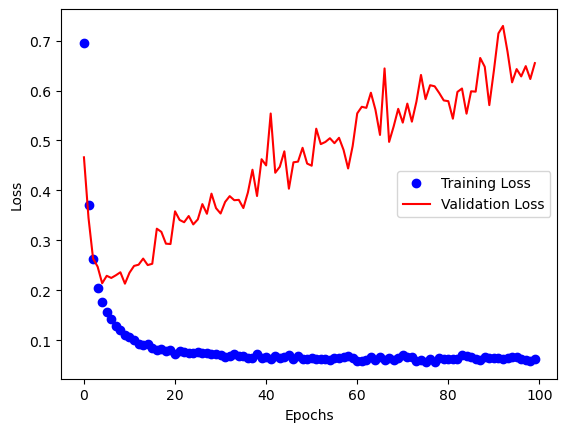

In [286]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Question  (10 points)

Do you think overfitting is happening? If yes, what can you do? Please make necessary changes to the supervised autoencoder network structure.

You can use the new model without overfitting for the following sections.

Yes the model is overfitting the data as the training loss drops but the validation loss increases after 10 epochs. This can be managed by using regularization techniques such as batch normalization or dropout.

In [287]:
# build the supervised autoencoder network
from keras.layers import *
from keras import models

input_img = Input(shape=(784,), name='input_img')

# encoder network
# Encoder layer 1
encode1 =  Dense(100,name='Encode1')(input_img)
bnencode1 = BatchNormalization()(encode1)
reluencode1 = Activation('relu')(bnencode1)

#Encoder layer 2
encode2 =  Dense(50,name='Encode2')(reluencode1)
bnencode2 = BatchNormalization()(encode2)
reluencode2 = Activation('relu')(bnencode2)

#Encoder layer 3
encode3 =  Dense(20,name='Encode3')(reluencode2)
bnencode3 = BatchNormalization()(encode3)
reluencode3 = Activation('relu')(bnencode3)

# The width of the bottleneck layer must be exactly 2.
bottleneck = Dense(2,activation='relu', name='Bottleneck')(reluencode3)

# decoder network
# Decoder layer 1
decode1 =  Dense(20,name='Decode1')(bottleneck)
bndecode1 = BatchNormalization()(decode1)
reludecode1 = Activation('relu')(bndecode1)

# Decoder layer 2
decode2 =  Dense(50,name='Decode2')(reludecode1)
bndecode2 = BatchNormalization()(decode2)
reludecode2 = Activation('relu')(bndecode2)

# Decoder layer 3
decode3 =  Dense(100,name='Decode3')(reludecode2)
bndecode3 = BatchNormalization()(decode3)
reludecode3 = Activation('relu')(bndecode3)

# Decoder layer 1
decode4 =  Dense(784,name='Decode4')(reluencode3)
bndecode4 = BatchNormalization()(decode4)
reludecode4 = Activation('relu')(bndecode4)

# build a classifier upon the bottleneck layer
#Classifier Layer 1
classifier1 = Dense(128, name='Classifier1')(bottleneck) 
bnclassifier1 = BatchNormalization()(classifier1)
reluclassifier1 = Activation('relu')(bnclassifier1)

# Classifier layer 2
classifier2 = Dense(128, name='Classifier2')(reluclassifier1) 
bnclassifier2 = BatchNormalization()(classifier2)
reluclassifier2 = Activation('relu')(bnclassifier2)

classifier3 = Dense(10, activation='softmax', name='Output')(reluclassifier2)

In [288]:
# connect the input and the two outputs
sae = models.Model(input_img, [reludecode4, classifier3])

sae.summary()

Model: "model_46"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_img (InputLayer)         [(None, 784)]        0           []                               
                                                                                                  
 Encode1 (Dense)                (None, 100)          78500       ['input_img[0][0]']              
                                                                                                  
 batch_normalization_54 (BatchN  (None, 100)         400         ['Encode1[0][0]']                
 ormalization)                                                                                    
                                                                                                  
 activation_51 (Activation)     (None, 100)          0           ['batch_normalization_54[0

In [290]:
SVG(model_to_dot(sae, show_shapes=False).create(prog='dot', format='svg'))

plot_model(
    model=sae, show_shapes=False,
    to_file='supervised_sae_updated.pdf'
)

# you can find the file "supervised_sae.pdf" in the current directory.

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


AttributeError: 'NoneType' object has no attribute 'create'

In [291]:
sae.compile(loss=['mean_squared_error', 'categorical_crossentropy'],
            loss_weights=[1, 0.5], # to be tuned
            optimizer=optimizers.RMSprop(learning_rate=1E-3))

history = sae.fit(x_tr, [x_tr, y_tr], 
                  batch_size=32, 
                  epochs=100, 
                  validation_data=(x_val, [x_val, y_val]))

Epoch 1/100


2023-05-02 19:37:25.749109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 0.7479 - activation_57_loss: 0.1394 - Output_loss: 1.2171

2023-05-02 19:37:39.980769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 20s 53ms/step - loss: 0.7479 - activation_57_loss: 0.1394 - Output_loss: 1.2171 - val_loss: 0.6334 - val_activation_57_loss: 0.0641 - val_Output_loss: 1.1386
Epoch 2/100
313/313 [==============================] - 13s 42ms/step - loss: 0.4511 - activation_57_loss: 0.0579 - Output_loss: 0.7863 - val_loss: 0.3472 - val_activation_57_loss: 0.0539 - val_Output_loss: 0.5867
Epoch 3/100
313/313 [==============================] - 13s 42ms/step - loss: 0.3675 - activation_57_loss: 0.0547 - Output_loss: 0.6255 - val_loss: 0.2949 - val_activation_57_loss: 0.0511 - val_Output_loss: 0.4875
Epoch 4/100
313/313 [==============================] - 13s 42ms/step - loss: 0.3084 - activation_57_loss: 0.0533 - Output_loss: 0.5103 - val_loss: 0.2514 - val_activation_57_loss: 0.0503 - val_Output_loss: 0.4023
Epoch 5/100
313/313 [==============================] - 13s 42ms/step - loss: 0.2911 - activation_57_loss: 0.0522 - Output_loss: 0.4778 - val_loss: 0.2247 - val_

313/313 [==============================] - 13s 42ms/step - loss: 0.0929 - activation_57_loss: 0.0413 - Output_loss: 0.1031 - val_loss: 0.2568 - val_activation_57_loss: 0.0391 - val_Output_loss: 0.4353
Epoch 78/100
313/313 [==============================] - 13s 43ms/step - loss: 0.0935 - activation_57_loss: 0.0411 - Output_loss: 0.1047 - val_loss: 0.2594 - val_activation_57_loss: 0.0387 - val_Output_loss: 0.4414
Epoch 79/100
313/313 [==============================] - 13s 42ms/step - loss: 0.0905 - activation_57_loss: 0.0412 - Output_loss: 0.0987 - val_loss: 0.2552 - val_activation_57_loss: 0.0390 - val_Output_loss: 0.4324
Epoch 80/100
313/313 [==============================] - 13s 42ms/step - loss: 0.0928 - activation_57_loss: 0.0412 - Output_loss: 0.1033 - val_loss: 0.2408 - val_activation_57_loss: 0.0390 - val_Output_loss: 0.4036
Epoch 81/100
313/313 [==============================] - 13s 42ms/step - loss: 0.1001 - activation_57_loss: 0.0412 - Output_loss: 0.1178 - val_loss: 0.2564 - 

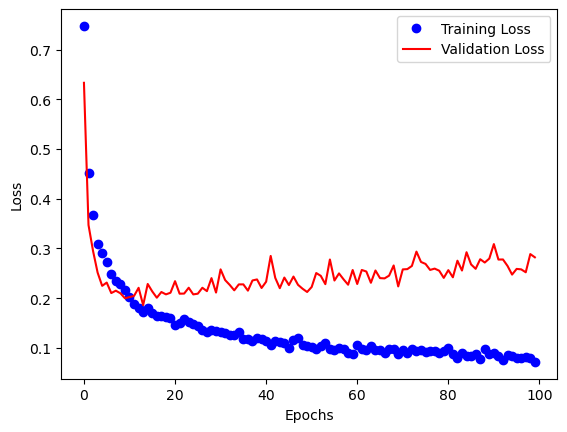

In [292]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### 4.3. Visualize the reconstructed test images

2023-05-02 19:59:34.498093: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 2s 5ms/step


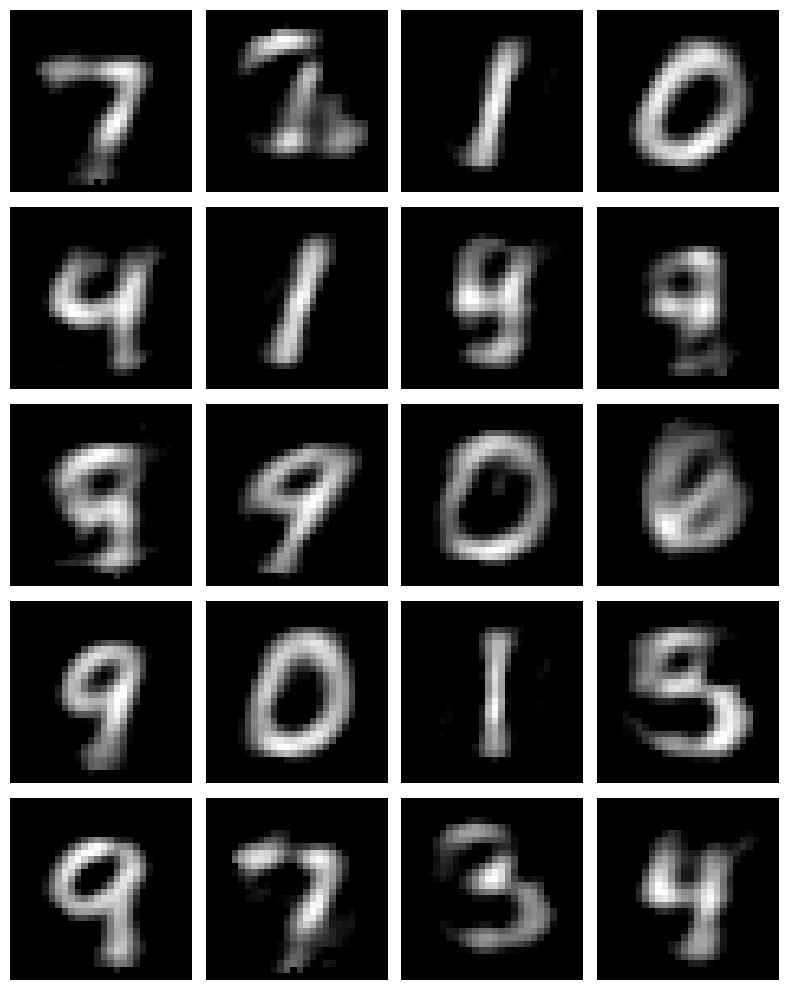

In [293]:
sae_output = sae.predict(x_test)[0].reshape((10000, 28, 28))

ROW = 5
COLUMN = 4

x = sae_output
fname = 'reconstruct_sae.pdf'

fig, axes = plt.subplots(nrows=ROW, ncols=COLUMN, figsize=(8, 10))
for ax, i in zip(axes.flat, np.arange(ROW*COLUMN)):
    image = x[i].reshape(28, 28)
    ax.imshow(image, cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.savefig(fname)
plt.show()

### 4.4. Visualize the low-dimensional features



In [294]:
# build the encoder model
sae_encoder = models.Model(input_img, bottleneck)
sae_encoder.summary()

Model: "model_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_img (InputLayer)      [(None, 784)]             0         
                                                                 
 Encode1 (Dense)             (None, 100)               78500     
                                                                 
 batch_normalization_54 (Bat  (None, 100)              400       
 chNormalization)                                                
                                                                 
 activation_51 (Activation)  (None, 100)               0         
                                                                 
 Encode2 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization_55 (Bat  (None, 50)               200       
 chNormalization)                                         

  5/313 [..............................] - ETA: 3s 

2023-05-02 19:59:36.624481: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 1s 2ms/step
Shape of encoded_test: (10000, 2)


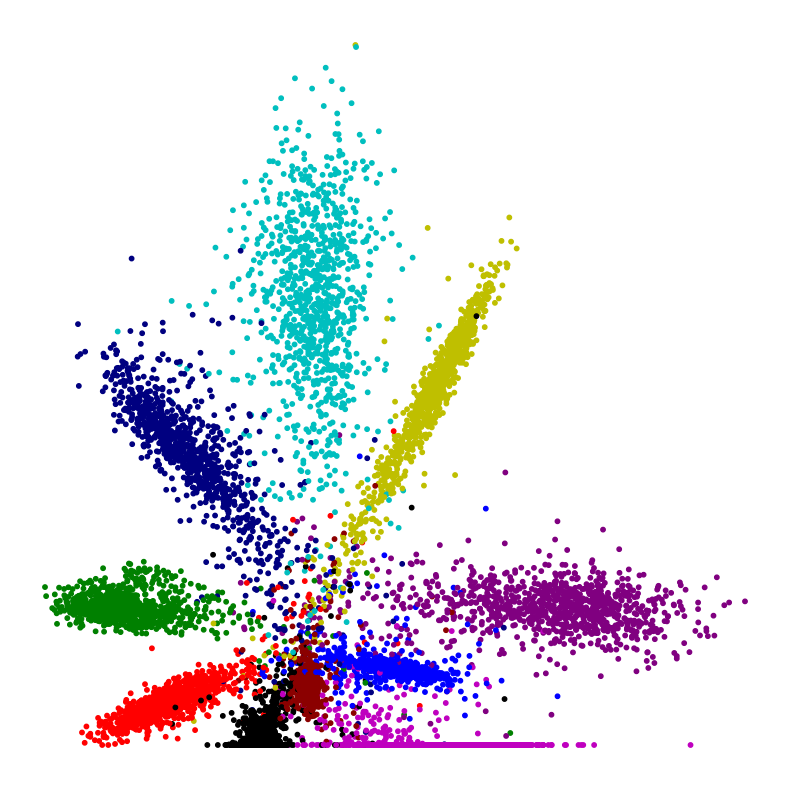

In [295]:
# extract test features
encoded_test = sae_encoder.predict(x_test)
print('Shape of encoded_test: ' + str(encoded_test.shape))

colors = np.array(['r', 'g', 'b', 'm', 'c', 'k', 'y', 'purple', 'darkred', 'navy'])
colors_test = colors[y_test]


import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(8, 8))
plt.scatter(encoded_test[:, 0], encoded_test[:, 1], s=10, c=colors_test, edgecolors=colors_test)
plt.axis('off')
plt.tight_layout()
fname = 'sae_code.pdf'
plt.savefig(fname)

### 4.5. Are the learned low-dim features discriminative? (10 points)

To find the answer, lets train a classifier on the training set (the extracted 2-dim features) and evaluation on the validation and test set.



In [296]:
# extract 2D features from the training, validation, and test samples
f_tr = sae_encoder.predict(x_tr)
f_val = sae_encoder.predict(x_val)
f_te = sae_encoder.predict(x_test)

print("X_tr shape", f_tr.shape)
print("X_tr shape", f_te.shape)

313/313 [==============================] - 1s 2ms/step
X_tr shape (10000, 2)
X_tr shape (10000, 2)


In [297]:
# build a classifier which takes the 2D features as input
from keras.layers import *
from keras import models

input_feat = Input(shape=(2,))

hidden1 = Dense(128, activation='relu')(input_feat)
hidden2 = Dense(128, activation='relu')(hidden1)
output = Dense(10, activation='softmax')(hidden2)

classifier = models.Model(input_feat, output)

classifier.summary()

Model: "model_48"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 2)]               0         
                                                                 
 dense_208 (Dense)           (None, 128)               384       
                                                                 
 dense_209 (Dense)           (None, 128)               16512     
                                                                 
 dense_210 (Dense)           (None, 10)                1290      
                                                                 
Total params: 18,186
Trainable params: 18,186
Non-trainable params: 0
_________________________________________________________________


In [298]:
classifier.compile(loss='categorical_crossentropy',
                  optimizer=optimizers.RMSprop(learning_rate=1E-4),
                  metrics=['acc'])

history = classifier.fit(f_tr, y_tr, 
                        batch_size=32, 
                        epochs=30, 
                        validation_data=(f_val, y_val))

Epoch 1/30


2023-05-02 19:59:40.198490: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - ETA: 0s - loss: 1.9403 - acc: 0.3074

2023-05-02 19:59:45.421579: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 9s 26ms/step - loss: 1.9403 - acc: 0.3074 - val_loss: 1.6899 - val_acc: 0.3823
Epoch 2/30
313/313 [==============================] - 8s 24ms/step - loss: 1.4855 - acc: 0.4015 - val_loss: 1.4097 - val_acc: 0.3801
Epoch 3/30
313/313 [==============================] - 8s 25ms/step - loss: 1.2366 - acc: 0.4132 - val_loss: 1.2273 - val_acc: 0.4594
Epoch 4/30
313/313 [==============================] - 7s 22ms/step - loss: 1.0495 - acc: 0.5575 - val_loss: 1.0854 - val_acc: 0.5832
Epoch 5/30
313/313 [==============================] - 7s 22ms/step - loss: 0.8925 - acc: 0.6887 - val_loss: 0.9636 - val_acc: 0.6745
Epoch 6/30
313/313 [==============================] - 7s 22ms/step - loss: 0.7466 - acc: 0.7915 - val_loss: 0.8477 - val_acc: 0.7768
Epoch 7/30
313/313 [==============================] - 7s 22ms/step - loss: 0.6066 - acc: 0.8601 - val_loss: 0.7378 - val_acc: 0.8207
Epoch 8/30
313/313 [==============================] - 7s 23ms/step - loss: 0.483

#### Remark: (10 points)

The validation accuracy must be above 90%. It means the low-dim features learned by the supervised autoencoder are very effective.

In [299]:
# evaluate your model on the never-seen-before test data
# write your code here:
loss = classifier.evaluate(f_te, y_test_vec)
print('loss = ' + str(loss))

313/313 [==============================] - 3s 10ms/step - loss: 0.4592 - acc: 0.9404
loss = [0.45916542410850525, 0.9404000043869019]
